<a href="https://colab.research.google.com/github/suhasreddybondugula/info5731/blob/master/Bondugula_Assign5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5: IMDB review sample Classification with fast.ai Deep Learning Framework


**Question 1: (10 points)**

Export the sample data set you created in [Classwork 3](https://colab.research.google.com/drive/1be7ksupqRkdjU1fZUAS37F5GiLCkFzkR) with pickle library, name it `imdb-sample.pickle`, and upload it to Google Colab. Then run the following codes.

In [0]:
from fastai.text import *
path = Path('.')
with open("imdb-sample.pickle", 'rb') as f:
    train, valid = pickle.load(f)
valid.tail()

,text,sentiment
995,"This is my opinion of this movie, expressed in...",0
996,Why can't a movie be rated a zero? Or even a n...,0
997,The Gun is probably the worst film I've ever s...,0
998,If you are thinking of going to see this film ...,0
999,This movie was like a gathering of people that...,0


You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-11-10-085256.png)

**Question 2: (10 points)**

Create a TextLMDataBunch instance called `data_lm`, load your train and valid Dataframe into it, and run the following code.

In [0]:
# Your code here:
data_lm = TextLMDataBunch.from_df( path,train_df=train, valid_df=valid, text_cols=['text'])
                 

In [0]:
data_lm.show_batch()

idx,text
0,"very moment . xxmaj mary xxmaj xxunk , who i seem to remember from xxup snl or some other xxup tv comedy skit show , is the evil wife , and xxmaj larry xxmaj drake plays the lunatic in the xxunk xxmaj santa outfit . i had forgotten xxmaj santa was played by xxmaj drake over the years . xxmaj his xxmaj santa is an unstoppable force and quite"
1,"these days . \n \n i understand it 's a movie and that 's why i accept it as a funny situation . xxmaj plus , the humor is versatile . xxmaj there are moments involving xxup xxunk , funny lines with xxmaj chabat 's best friend , some lesbian references , funny situations involving the family women , and more . \n \n xxmaj charlotte xxmaj xxunk"
2,"xxmaj chocolat before my viewing of it . i did n't know anything about the story , the cast , the director , or anything about the film 's history . xxmaj all i knew was it was a highly - acclaimed xxmaj french film . xxmaj had i known more , i probably would n't have viewed the picture with an open mind . xxmaj on paper ,"
3,"xxunk xxmaj digital xxunk xxmaj surround xxmaj sound . xxup dvd also an jam session with xxmaj sandler & xxmaj cheadle , an featurette , photo montage and previews . i was expecting more for the xxup dvd features like an audio commentary track by the director and deleted scenes . "" xxmaj reign xxmaj over xxmaj me "" is certainly one of the best films that came out"
4,"his stuntmen were injured during this movie that nobody would insure them anymore - xxmaj jackie had to take responsibility himself . xxmaj there are no gimmicks , wires or stand - ins - it is all true - life action that is a treat to watch . xxmaj it is this type of action that made him the phenomenon that he is and it is a movie that"


You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-14-25-459713.png)

**Question 3: (10 points)**

Create a `language_model_learner` named `learn`, use `data_lm` as input data, `AWD_LSTM` as architecture, and choose 0.5 as Dropout rate. Draw the result of learning rate finder.

In [0]:
# Your code here:

learn= language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


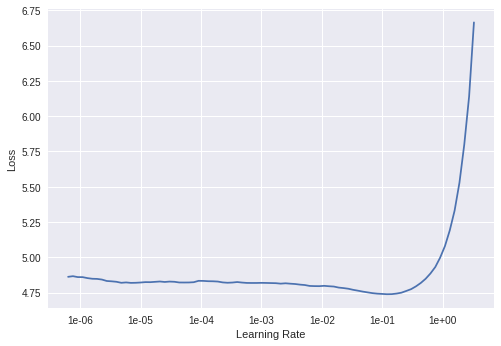

In [0]:
learn.recorder.plot()

You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-17-47-701082.png)

**Question 4: (20 points)**

Fit one cycle with your language learner (`learn`), unfreeze it and fit another 3 cycles. Save the language learner's encoder as `ft_enc`.

In [0]:
# Your code here:

learn.fit_one_cycle(1, 1e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.455748,3.994112,0.284567,01:07


In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(3, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.118982,3.920851,0.291839,01:20
1,3.987141,3.877578,0.295735,01:20
2,3.833314,3.868665,0.296833,01:20


In [0]:
learn.predict("this is a review about", n_words=10)

'this is a review about ... \n \n  But the graphics are lacking passenger balance'

In [0]:
learn.save_encoder('ft_enc')

You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-20-09-953060.png)

**Question 5: (10 points)**

Create a TextClasDataBunch instance called `data_clas`, load your train and valid Dataframe into it, use the vocab from `data_lm.train_ds.vocab`, set batch size as 32, and run the following code.

In [0]:
# Your code here:

data_clas = TextClasDataBunch.from_df(path, train_df=train, valid_df=valid, vocab=data_lm.train_ds.vocab, bs=32, label_cols=1, text_cols=['text'])

In [0]:
data_clas.show_batch()

text,target
"xxbos xxmaj the freedom of having your own xxmaj sea xxmaj going xxmaj power xxmaj boat , the excitement of going on underwater adventures a rugged , an 's man of an adventurer and xxunk so well endowed ! ) xxunk in fine xxmaj bikinis were all definite selling points for "" xxup sea xxup xxunk - 61 ) . \n \n xxmaj just what was the reason for",1
"xxbos xxmaj the best film on the battle of xxmaj san xxmaj antonio , xxmaj texas in xxmaj march 1836 , was xxmaj john xxmaj wayne 's 1960 epic xxup the xxup alamo . xxmaj in a one shot job as director producer , that temporarily financially strapped him , xxmaj wayne demonstrated that he was talented in movie making outside of his icon - like acting ability xxunk the",1
"xxbos xxmaj how viewers react to this new "" adaption "" of xxmaj shirley xxmaj jackson 's book , which was promoted as xxup not being a remake of the original 1963 movie ( true enough ) , will be based , i suspect , on the following : those who were big fans of either the book or original movie are not going to think much of this one",0
"xxbos xxmaj funny that i find myself forced to review this movie , but here i am . \n \n i am reviewing it , because just recently , i have had the chance to witness the revival of xxup r.c. xxmaj sheriff 's play "" xxmaj journey 's xxmaj end "" on stage in xxmaj new xxmaj york , at the xxmaj xxunk xxmaj theatre , starring xxmaj",0
xxbos xxmaj anthony xxmaj mann 's westerns with xxmaj jimmy xxmaj stewart are slowly gaining for that director a position with xxmaj john xxmaj ford and xxmaj howard xxmaj hawks as the best film director in that genre . xxmaj he certainly knows how to give dimension to nice guy xxmaj stewart - in xxmaj mann 's films there is an edge to xxmaj jimmy that is slowly demonstrated to,1


You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-24-53-893234.png)

**Question 6: (10 points)**

Create a `text_classifier_learner` named `learn`, use `data_clas` as input data, `AWD_LSTM` as architecture, and choose 0.5 as Dropout rate. Note to compare the result with Scikit-learn and textblob later, you need to make sure Precision and Recall are in the metrics list. Load the encoder  (`ft_enc`) you saved just now into `learn`. Draw the result of learning rate finder.

In [0]:
# Your code here:

learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
precision=Precision()
recall=Recall()
learn.metrics=[accuracy,precision,recall]
learn.load_encoder('ft_enc')

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


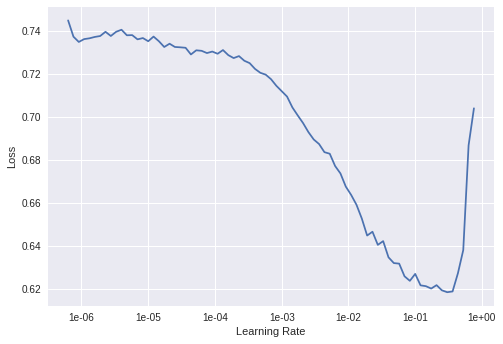

In [0]:
learn.recorder.plot()

You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-27-55-239469.png)

**Question 7: (20 points)**

Fit one cycle with your text classifier learner (`learn`). Unfreeze the last two layers, and fit 3 cycles. Then unfreeze it totally, and fit another 2 cycles. Show the training result.

In [0]:
# Your code here:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,0.518510,0.435107,0.807000,0.784787,0.846000,00:59


In [0]:
learn.save('first')

In [0]:
learn.load('first')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (2000 items)
x: TextList
xxbos i have watched this episode more often than any other xxup xxunk episode , it is that enjoyable . xxmaj and it is quite scary , but all in good , xxunk fun . a woman kills her 2nd husband but runs into a problem when an escaped maniac in a xxunk xxmaj santa xxmaj claus outfit decides to pay her and her little girl a visit at that very moment . xxmaj mary xxmaj xxunk , who i seem to remember from xxup snl or some other xxup tv comedy skit show , is the evil wife , and xxmaj larry xxmaj drake plays the lunatic in the xxunk xxmaj santa outfit . i had forgotten xxmaj santa was played by xxmaj drake over the years . xxmaj his xxmaj santa is an unstoppable force and quite frightening at times . xxmaj you can probably guess how xxmaj santa finally gets into the house . xxmaj the episode is played for laughs , but it also can be pretty intense at times .,xxbos xxmaj as many reviewers here have noted , the film 

In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(3, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,0.459942,0.411574,0.808000,0.892857,0.700000,01:09
1,0.435929,0.348413,0.848000,0.846614,0.850000,01:09
2,0.356392,0.331613,0.849000,0.844181,0.856000,01:09


In [0]:
learn.save('second')

In [0]:
learn.load('second')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (2000 items)
x: TextList
xxbos i have watched this episode more often than any other xxup xxunk episode , it is that enjoyable . xxmaj and it is quite scary , but all in good , xxunk fun . a woman kills her 2nd husband but runs into a problem when an escaped maniac in a xxunk xxmaj santa xxmaj claus outfit decides to pay her and her little girl a visit at that very moment . xxmaj mary xxmaj xxunk , who i seem to remember from xxup snl or some other xxup tv comedy skit show , is the evil wife , and xxmaj larry xxmaj drake plays the lunatic in the xxunk xxmaj santa outfit . i had forgotten xxmaj santa was played by xxmaj drake over the years . xxmaj his xxmaj santa is an unstoppable force and quite frightening at times . xxmaj you can probably guess how xxmaj santa finally gets into the house . xxmaj the episode is played for laughs , but it also can be pretty intense at times .,xxbos xxmaj as many reviewers here have noted , the film 

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,0.324961,0.320859,0.861000,0.856016,0.868000,02:05
1,0.302312,0.320157,0.862000,0.856299,0.870000,02:08


You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-31-32-631875.png)

**Question 8: (10 points)**

Comparing the result with those from textblob, scikit-learn in Classwork 3, what is your finding? How about comparing with the result from Self-study 7 (the whole IMDB dataset)? Write down your answer and comments.

*Your answer here:*



Comparing the results with those from textblob, scikit-learn in Classwork 3, we can observe that precision and recall rates here are higher than that in Classwork 3. By comparing the results with self-study 7 we can see that accuracy here 0.86 is less than the accuracy in self-study 7. From this we can say that a larger training data results in a better model.